In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [51]:
data, target = make_moons(500,noise=0.2)

In [52]:
data.shape

(500, 2)

In [53]:
target[0]

0

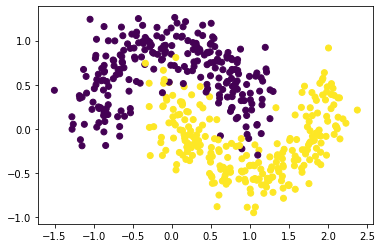

In [54]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

In [55]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.20)

In [56]:
def plot_boundary(pred_func):
    x1 = np.arange(min(data[:,0]) - 1, max(data[:,0]) + 1, 0.01)
    x2 = np.arange(min(data[:,1]) - 1, max(data[:,1]) + 1, 0.01)
    xx,yy = np.meshgrid(x1,x2)
    x = np.array([xx.flatten(),yy.flatten()]).T
    z = pred_func(x)
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=ListedColormap(('cyan','gray')))
    plt.scatter(data[:,0],data[:,1],c=target)
    plt.show()

In [57]:
reg = LogisticRegression()
reg.fit(data,target)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

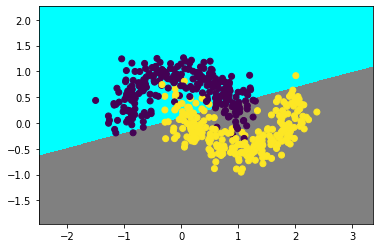

In [58]:
plot_boundary(lambda x : reg.predict(x))

In [59]:
y_pred = reg.predict(data)
accuracy_score(target,y_pred)

0.882

In [60]:
svm = SVC(C=1)
svm.fit(data,target)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

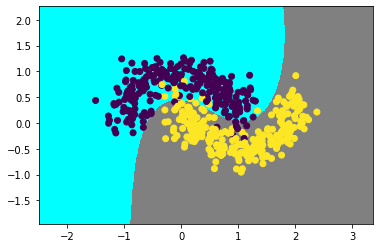

In [61]:
plot_boundary(lambda x : svm.predict(x))

In [50]:
y_pred = svm.predict(data)
accuracy_score(target,y_pred)

0.776